In [2]:
from matplotlib import pyplot
import numpy as np
import plotly.graph_objects as go

# Будем решать систему вида:
# y_1' = f_1(t,y_1,...,y_n)
# ...
# y_n' = f_n(t, y_1,...,y_n)

def RungeKutt1(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h * k1[j] for j in range(system_size)])
        t += h
    return np.transpose(result)

def RungeKutt2(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h] + [result[-1][k] + k1[k] * h for k in range(system_size)]
        k2 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h / 2 * (k1[j] + k2[j]) for j in range(system_size)])
        t += h
    return np.transpose(result)

def RungeKutt3(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h / 2] + [result[-1][k] + k1[k] * h / 2 for k in range(system_size)]
        k2 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h] + [result[-1][k] - h * k1[k]  + 2 * h * k2[k] for k in range(system_size)]
        k3 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h / 6 * (k1[j] + 4*k2[j] + k3[j]) for j in range(system_size)])
        t += h
    return np.transpose(result)

def RungeKutt4(funcs, t0, initial, h, N):
    t = t0
    result = [initial]
    system_size = len(initial)
    for i in range(1, N):
        args = [t] + result[-1]
        k1 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h / 2] + [result[-1][k] + k1[k] * h / 2 for k in range(system_size)]
        k2 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h / 2] + [result[-1][k] + k2[k] * h / 2 for k in range(system_size)]
        k3 = [funcs[j](*args) for j in range(system_size)]
        args = [t + h] + [result[-1][k] + k3[k] * h for k in range(system_size)]
        k4 = [funcs[j](*args) for j in range(system_size)]
        result.append([result[-1][j] + h / 6 * (k1[j] + 2 * k2[j] + 2 * k3[j] + k4[j]) for j in range(system_size)])
        t += h
    return np.transpose(result)


***Постановка задачи***

Тело массы $5$ кг, находящееся в начале координат брошено под углом $\alpha=\frac{\pi}{6}$ с начальной скоростью $v_0 = 5$ м/c. Сопротивление воздуха считать пропорциональным скорости тела и направленным противоположное ей. Коэффициент пропорциональности $k=0.25$. Найти законы изменения координат тела.

***Составление системы дифференциальных уравнений***

Распишем второй закон Ньютона в проекции на оси OX и OY:

$$
\left\{\begin{array}{lcl} ma_x = -kv_x \\ ma_y = -mg - kv_y \end{array}\right. \Rightarrow \left\{\begin{array}{lcl} mx'' = -kx' \\ my'' = -mg - ky' \end{array}\right. \Rightarrow \left\{\begin{array}{lcl} x'' = -\frac{k}{m}x' \\ y'' = -g - \frac{k}{m}y' \end{array}\right. 
$$

Мы знаем, что в момент времени $t=0:\ x = 0,\ y = 0,\ v_x = x' = v_0\cos\alpha,\ v_y = y' = v_0\sin\alpha$

Обозначим $y_1 = x,\ y_2 = y,\ y_3 = x',\ y_4 = y'$. Тогда наша система примет вид:

$$
\left\{\begin{array}{lcl} y_1' = y_3 \\ y_2' = y_4 \\ y_3' = -\frac{k}{m}y_3 \\ y_4' = -g - \frac{k}{m}y_4 \end{array}\right. 
$$

С начальными условиями: 

$$
y_1(0) = 0,\ y_2(0) = 0,\ y_3(0) = v_0\cos\alpha,\ y_4(0) = v_0\sin\alpha
$$

***Аналитическое решение системы дифференциальных уравнений***

$1)$ Найдём $y_3:$

$$
y_3' = -\frac{k}{m}y_3 \Rightarrow \frac{dy_3}{y_3} = -\frac{k}{m}\ dt \Rightarrow \ln|y_3| = -\frac{k}{m}t + C \Rightarrow y_3 = C\cdot e^{-\frac{k}{m}t}
$$

Согласно начальному условию: $y_3(0) = v_0\cos\alpha$. найдём $C$:

$$
y_3(0) = C\cdot e^{-\frac{k}{m}\cdot 0} = C = v_0\cos\alpha
$$

Получаем решение:

$$
y_3 = v_0\cos\alpha\cdot e^{-\frac{k}{m}t}
$$

$2)$ Найдём $y_4:$

$$
y_4' = -g - \frac{k}{m}y_4 \Rightarrow y_4' + \frac{k}{m}y_4 = -g
$$

$2.1)$ Решим однородную часть:

$$
y_4' + \frac{k}{m}y_4 = 0\Rightarrow \ln|y_4| = -\frac{k}{m}t + C \Rightarrow y_4 = C \cdot e^{-\frac{k}{m}t}
$$

$2.2)$ Найдём чаастное решение $y_{4_0} = a$

$$
\frac{k}{m}a = -g \Rightarrow a = -\frac{mg}{k}
$$

Получаем решение:

$$
y_4 = C\cdot e^{-\frac{k}{m}t} - \frac{mg}{k}
$$

Согласно начальному условию: $y_4(0) = v_0\sin\alpha$. Найдём $C$:

$$
y_4(0) = C - \frac{mg}{k} = v_0\sin\alpha \Rightarrow C = v_0\sin\alpha +  \frac{mg}{k}
$$

Получаем решение:

$$
y_4 = \left(v_0\sin\alpha +  \frac{mg}{k}\right)\cdot e^{-\frac{k}{m}t} - \frac{mg}{k}
$$

$3)$ Найдём $y_1:$

$$
y_1' = y_3 = v_0\cos\alpha\cdot e^{-\frac{k}{m}t} \Rightarrow y_1 = \int v_0\cos\alpha\cdot e^{-\frac{k}{m}t}\ dt = -\frac{m}{k}v_0\cos\alpha\cdot e^{-\frac{k}{m}t} + C
$$

Согласно начальному условию: $y_1(0) = 0$. Найдём $C:$

$$
y_1(0) = -\frac{m}{k}v_0\cos\alpha + C \Rightarrow C = \frac{m}{k}v_0\cos\alpha
$$

Получаем решение:

$$
y_1 = -\frac{m}{k}v_0\cos\alpha\cdot e^{-\frac{k}{m}t} + \frac{m}{k}v_0\cos\alpha = \frac{m}{k}v_0\cos\alpha\left(1 - e^{-\frac{k}{m}t}\right)
$$

$4)$ Найдём $y_2:$

$$
y_2' = y_4 = \left(v_0\sin\alpha +  \frac{mg}{k}\right)\cdot e^{-\frac{k}{m}t} - \frac{mg}{k} \Rightarrow y_2 = \int \left(v_0\sin\alpha +  \frac{mg}{k}\right)\cdot e^{-\frac{k}{m}t} - \frac{mg}{k}\ dt = 
$$

$$
= -\frac{m}{k}\left(v_0\sin\alpha +  \frac{mg}{k}\right)\cdot e^{-\frac{k}{m}t} - \frac{mg}{k}t + C
$$

Согласно начальному условию: $y_2(0) = 0$. Найдём $C:$

$$
y_2(0) = -\frac{m}{k}\left(v_0\sin\alpha +  \frac{mg}{k}\right) + C = 0 \Rightarrow C = \frac{m}{k}\left(v_0\sin\alpha +  \frac{mg}{k}\right)
$$

Получаем решение:

$$
y_2 = -\frac{m}{k}\left(v_0\sin\alpha +  \frac{mg}{k}\right)\cdot e^{-\frac{k}{m}t} - \frac{mg}{k}t + \frac{m}{k}\left(v_0\sin\alpha +  \frac{mg}{k}\right) = \frac{m}{k}\left(\left(v_0\sin\alpha +  \frac{mg}{k}\right)\left(1 - e^{-\frac{k}{m}t}\right) - gt\right)
$$

Таким образом, получаем:

$$
\left\{ \begin{array}{lcl} x(t) = \frac{m}{k}v_0\cos\alpha\left(1 - e^{-\frac{k}{m}t}\right) \\ y(t) =  \frac{m}{k}\left(\left(v_0\sin\alpha +  \frac{mg}{k}\right)\left(1 - e^{-\frac{k}{m}t} \right) - gt\right) \end{array} \right.
$$

Подставим значения:

$$
\left\{ \begin{array}{lcl} x(t) = 50\sqrt{3}\left(1 - e^{-0.05t}\right) \\ y(t) =  3970\left(1 - e^{-0.05t} \right) - 196t \end{array} \right.
$$

**Система ДУ и начальные условия**

In [21]:
m = 5
k = 0.25
v0 = 5
angle = np.pi / 6
g = 9.8

funcs = [
    lambda t, y1, y2, y3, y4: y3,
    lambda t, y1, y2, y3, y4: y4,
    lambda t, y1, y2, y3, y4: -k / m * y3,
    lambda t, y1, y2, y3, y4: -g - k / m * y4
]

t0 = 0
initial = [0, 0, v0 * np.cos(angle), v0 * np.sin(angle)]
N = 55
h = 0.01
args = [i * h for i in range(N)]

**Аналитическое решение**

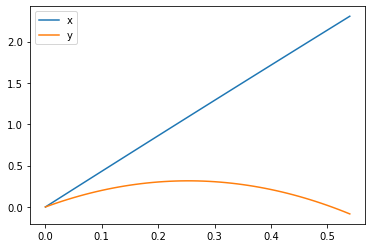

In [22]:
result0 = [
    list(map(lambda t: m / k * v0 * np.cos(angle) * (1 - np.exp(- k / m * t)), args)),
    list(map(lambda t: m / k * ((v0 * np.sin(angle) + m * g / k) * (1 - np.exp(- k / m * t)) - g * t), args))
]

fig, ax = pyplot.subplots()
ax.plot(args, result0[0], label="x")
ax.plot(args, result0[1], label="y")

ax.legend()
pyplot.show()

**Рунге-Кутт 1-го порядка**

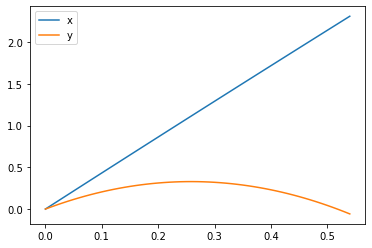

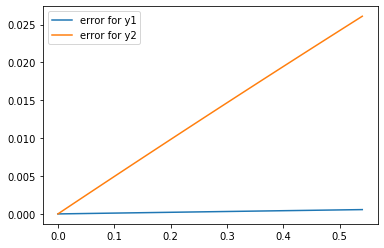

In [23]:
result1 = RungeKutt1(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
ax.plot(args, result1[0], label="x")
ax.plot(args, result1[1], label="y")

ax.legend()
pyplot.show()

error1 = [[abs(result1[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

# figpl = go.Figure()
fig, ax = pyplot.subplots()
for i in range(len(error1)):
#     figpl.add_trace(go.Scatter(x=args, y=error1[i], mode="markers", name="RungeKutt1, " + str(i + 1))) # adding real solution plot
    ax.plot(args, error1[i], label="error for y" + str(i + 1))
# figpl.show()
ax.legend()
pyplot.show()

**Рунге-Кутт 2-го порядка**

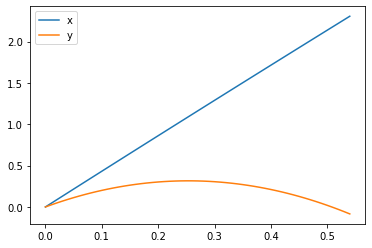

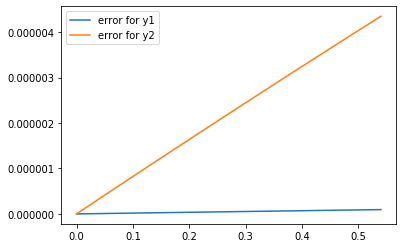

In [24]:
result2 = RungeKutt2(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
ax.plot(args, result2[0], label="x")
ax.plot(args, result2[1], label="y")

ax.legend()
pyplot.show()

error2 = [[abs(result2[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

fig, ax = pyplot.subplots()
for i in range(len(error2)):
    ax.plot(args, error2[i], label="error for y" + str(i + 1))

ax.legend()
pyplot.show()

**Рунге-Кутт 3-го порядка**

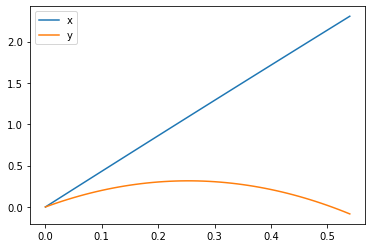

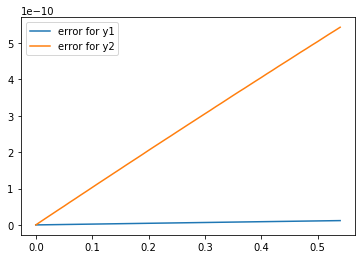

In [25]:
result3 = RungeKutt3(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
ax.plot(args, result3[0], label="x")
ax.plot(args, result3[1], label="y")

ax.legend()
pyplot.show()

error3 = [[abs(result3[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

fig, ax = pyplot.subplots()
for i in range(len(error3)):
    ax.plot(args, error3[i], label="error for y" + str(i + 1))

ax.legend()
pyplot.show()

**Рунге-Кутт 4-го порядка**

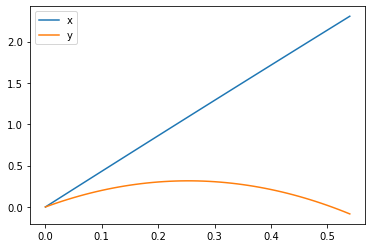

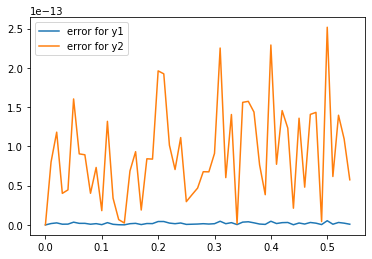

In [26]:
result4 = RungeKutt4(funcs, t0, initial, h, N)

fig, ax = pyplot.subplots()
ax.plot(args, result4[0], label="x")
ax.plot(args, result4[1], label="y")

ax.legend()
pyplot.show()

error4 = [[abs(result4[i][j] - result0[i][j]) for j in range(len(result0[i]))] for i in range(len(result0))]

fig, ax = pyplot.subplots()
for i in range(len(error4)):
    ax.plot(args, error4[i], label="error for y" + str(i + 1))

ax.legend()
pyplot.show()

**Доказательство корректности для Рунге-Кутта 2-го порядка**  

Итак, у нас есть система ДУ 
$$y' = f(t, y(t))$$ где $y', y \in \mathbb{R}^n$ и $t \in \mathbb{R}$.   
Разложим в ряд Тейлора в точке $t$:
$$y(t + h) = y(t) + hy'(t) + \frac{h^2}{2}y''(t) + O(h^3) \ \ \ \ \ \ \ \ (1)$$
Найдём $y''(t)$ из $y'(t) = f(t, y(t))$:

$$y''(t) = f'_t(t, y(t)) + f'_y(t, y(t)) \cdot f(t, y(t))$$

Подставляем в (1) и получаем

$$y(t + h) = y(t) + hf(t, y) + \frac{h^2}{2}\bigg(f'_t(t, y) + f'_y(t, y) \cdot f(t, y)\bigg) + O(h^3) = $$
$$= y(t) + \frac{h}{2}f(t, y) + \frac{h}{2}\bigg(f(t, y) + hf'_t(t, y) + hf'_y(t, y) \cdot f(t, y)\bigg) + O(h^3) \ \ \ \ \ \ \ \ (2)$$

Далее, запишем разложение Тейлора для двух переменных

$$f(t + h, y + k) = f(t , y)  + hf'_t(t, y) + kf'_y(t, y) + ...$$

Теперь возьмём $k = hf(t, y)$ и получим

$$f(t + h, y + hf(t, y)) = f(t , y)  + hf'_t(t, y) + hf(t, y)f'_y(t, y) + O(h^2)$$

Это то, что нам надо в выражении (2):
$$y(t + h) = y(t) + \frac{h}{2}f(t, y) + \frac{h}{2}f(t + h, y + hf(t, y)) + O(h^3)$$

Отсюда легко написать

$$y_{n + 1} = y_n + \frac{h}{2}(k_1 + k_2)$$
$$k_1 = f(t_n, y_n)$$
$$k_2 = f(t_n + h, y_n + hk_1)$$